Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

In [0]:
def train_valid_pipeline(model, X, y, params):
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
  model.fit(X_train, y_train)
  print("Accuracy on train: ", model.score(X_train, y_train))

  valid = GridSearchCV(model, param_grid = params, cv = 5)
  valid.fit(X_train, y_train)
  print("Accuracy after regularization: ", valid.best_score_)
  print("Best params: ", valid.best_params_)
  model = valid.best_estimator_

  print("Accuracy on test: ", model.score(X_test, y_test))

## Задание 1

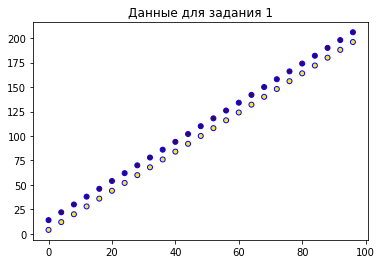

In [192]:
plt.title("Данные для задания 1")
#X1, Y1 = make_classification(n_samples=100, n_informative=2, n_redundant=0, n_features=2, n_classes=2, random_state=50)

d1 = [(x, 2*x + 4) for x in range(0, 100, 4)]
d0 = [(x, z+10) for x, z in d1]
X1 = np.array(d1+d0)
Y1 = np.array([1 for i in range(25)] + [0 for i in range(25)])

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='b')

In [0]:
params_logreg = {'dual' : [True, False], 'C': np.arange(.01,1,.01), 'solver' : ['liblinear']}

In [184]:
train_valid_pipeline(LogisticRegression(), X1, Y1, params_logreg)

Accuracy on train:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy after regularization:  1.0
Best params:  {'C': 0.9500000000000001, 'dual': False, 'solver': 'liblinear'}
Accuracy on test:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [0]:
paramsKNN = {'n_neighbors': range(1, 10), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [185]:
train_valid_pipeline(KNeighborsClassifier(), X1, Y1, paramsKNN)

Accuracy on train:  0.8378378378378378
Accuracy after regularization:  0.6857142857142857
Best params:  {'algorithm': 'auto', 'n_neighbors': 5}
Accuracy on test:  0.3076923076923077


KNN справляется хуже, потому что данные очень близко расположены друг к другу, но очень хорошо разделяются прямой

## Задание 2

In [0]:
X, y = make_circles(factor=0.5, random_state=50, noise=0.05)

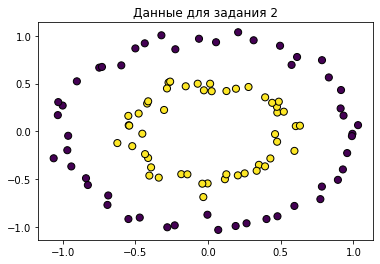

In [9]:
plt.title("Данные для задания 2")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

In [10]:
train_valid_pipeline(LogisticRegression(), X, y, params_logreg)

Accuracy on train:  0.5333333333333333
Accuracy after regularization:  0.5333333333333333
Best params:  {'C': 0.01, 'dual': True, 'solver': 'liblinear'}
Accuracy on test:  0.4


In [11]:
train_valid_pipeline(KNeighborsClassifier(), X, y, paramsKNN)

Accuracy on train:  1.0
Accuracy after regularization:  1.0
Best params:  {'algorithm': 'auto', 'n_neighbors': 2}
Accuracy on test:  0.96


Логистическая регрессия справляется хуже, потому что данные нельзя разделить прямой

### Задание 3

Thanks to https://cmry.github.io/notes/euclidean-v-cosine

In [0]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

In [0]:
x0 = X[0][:-1]
x1 = X[1][:-1]
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [14]:
x0

array([6.6, 6.2])

In [15]:
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t", cosine_similarity(x0, x1))

vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556


Евкл. расстояние смотрит на просто расстояние между векторами, а косинусное на угол между ними. Значит, нам нужны близко расположенные друг к другу вектора, но при этом под большим углом

Можно сделать один класс лежащим на прямой, а второй - равномерно распределенный по плоскости (чтобы расстояние не играло роль)

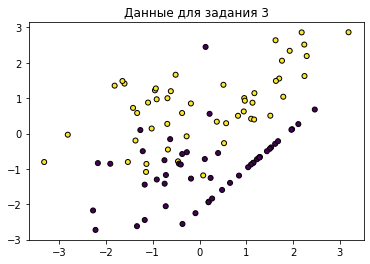

In [203]:
plt.title("Данные для задания 3")
X3, Y3 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2, random_state=50)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')

In [194]:
train_valid_pipeline(KNeighborsClassifier(metric="euclidean"), X3, Y3, paramsKNN)

Accuracy on train:  0.88
Accuracy after regularization:  0.8933333333333333
Best params:  {'algorithm': 'auto', 'n_neighbors': 4}
Accuracy on test:  0.72


In [195]:
train_valid_pipeline(KNeighborsClassifier(metric="cosine"), X3, Y3,
                 {'n_neighbors': range(1, 10)})

Accuracy on train:  0.8933333333333333
Accuracy after regularization:  0.8933333333333333
Best params:  {'n_neighbors': 3}
Accuracy on test:  0.76


Косинусное расстояние работает лучше чем евклидово, так как один класс более или менее лежит на прмямой, а второй более или менее разбросан по плоскости